# Load LFP

In [10]:
import spikeinterface.full as si
import spikeinterface.widgets as sw
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

mice = '20250310_VN_tremor'
base_folder = Path(f'/data1/zhangyuhao/xinchao_data/NP2/{mice}')

recording_loaded = si.load(base_folder / 'LFP')
recording_loaded

BinaryFolderRecording: 384 channels - 30000.149167 Hz - 1 segments - 48,401,133 samples 
                       1,613.36s (26.89 minutes) - int16 dtype - 34.62 GiB

In [ ]:
print(f'Loaded channels ids: {recording_loaded.get_channel_ids()}')
print(f'Channel groups after loading: {recording_loaded.get_channel_groups()}')

# FFT

In [11]:
from scipy.fft import fft, fftfreq

traces0 = recording_loaded.get_traces(segment_index=0)
traces0 = traces0.T
traces0


array([[-7, -4, -5, ...,  3,  3,  3],
       [-2,  1, -1, ...,  1,  1,  1],
       [-2,  2,  1, ...,  2,  2,  2],
       ...,
       [ 6, 29, 26, ...,  4,  4,  4],
       [ 4, 22, 19, ...,  1,  1,  1],
       [ 4, 26, 23, ...,  4,  4,  4]], dtype=int16)

/tmp/ipykernel_1829573/3259143617.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


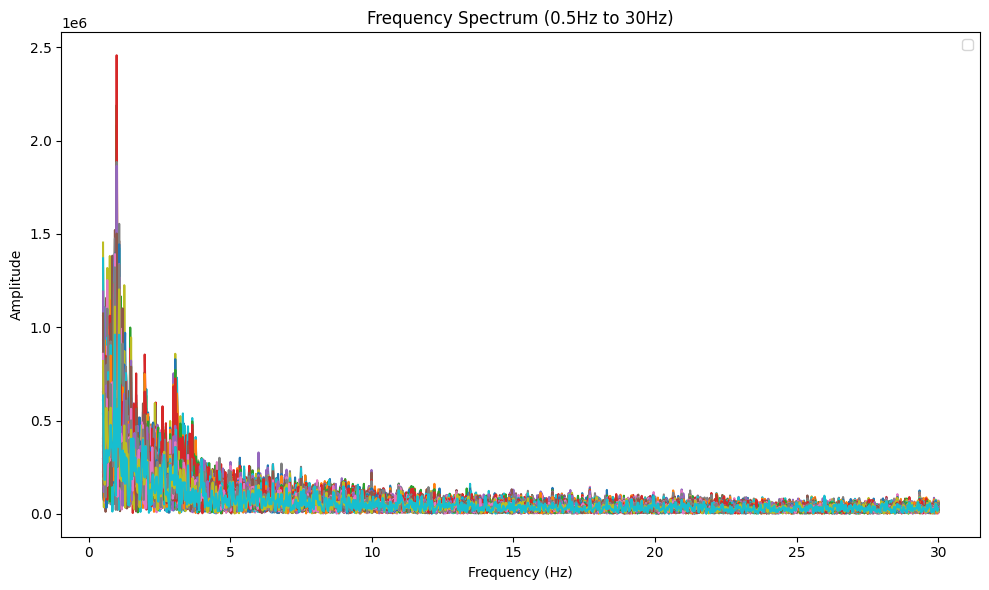

In [33]:
traces_trunc = traces0[:70, 10000000:11000000]  # 0-2000000, 2000000-4000000, 4000000-6000000, 6000000-8000000
# Sampling frequency
fs = 30000  # 30 kHz

# Perform FFT for each row
fft_results = np.abs(fft(traces_trunc, axis=1))
frequencies = fftfreq(traces_trunc.shape[1], 1 / fs)

# Filter frequencies between 0.5Hz and 30Hz
freq_mask = (frequencies >= 0.5) & (frequencies <= 30)

# Plot frequency spectrum for all rows in one figure
plt.figure(figsize=(10, 6))
for i in range(traces_trunc.shape[0]):
    plt.plot(frequencies[freq_mask], fft_results[i, freq_mask])
plt.title('Frequency Spectrum (0.5Hz to 30Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()